# Project1 : 캘리포니아 주택 가격 분석

## 1. 데이터셋
+ scikit-learn 에서 제공하는 캘리포니아 주택 가격 데이터를 이용하여
1990년대 캘리포니아 지역의 주택 가격에 대한 데이터
+ 데이터셋은  20,640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수 (target)으로 구성됨

## 2. 데이터 확인 및 전처리

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이터 불러오기
from sklearn.datasets import fetch_california_housing
data= fetch_california_housing(as_frame=True)
df = data.frame
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [6]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


+ 캘리포니아 주택 가격 데이터를 확인한 결과 , 관측값은 20,640개, 변수는 9개로 나타남
+ 주택 가격에 영향을 미치는 특성(feature)은 다음과 같음
  + MedInc	지역 중위 소득 (10,000 USD)
  + HouseAge	주택 연식 (건축 후 경과된 연도 수)
  + AveRooms	가구당 평균 방 개수
  + AveBedrms	가구당 평균 침실 개수
  + Population	지역 내 인구 수
  + AveOccup	가구당 평균 거주 인원 수
  + Latitude	위도
  + Longitude	경도
  + MedHouseVal	주택 중위 가격 (100,000 USD)
+ 종속변수(target)는 MedhouseVal임

In [7]:
# 데이터 전처리 : 결측값 확인
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


<br>

## 3. 학습/평가 데이터 분할
 + 학습 데이터와 평가 데이터를 7:3 비율로 분할함

In [11]:
# 학습/평가 데이터 분할 (7:3 비율)
X = data.data         #feature
y = data.target      #target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [15]:
data.target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [16]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
17505,2.37500
13512,0.67300
10842,2.18400
16559,1.19400


In [17]:
print(X_train.shape)

(14448, 8)


<br>

## 4. 데이터 탐색

In [18]:
y_train

,MedHouseVal
7061,1.93800
14689,1.69700
17323,2.59800
10056,1.36100
15750,5.00001
...,...
11284,2.29200
11964,0.97800
5390,2.22100
860,2.83500


In [19]:
# 요약 통계량 확인
df_train = pd.concat([X_train,y_train],axis=1)
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


+ 중위 주택 가격의 평균은 약 20만 달러,표준편차는 11만 달러로 나타남
  + 중위 주택 가격의 최소값은 1만4천 달러,1사분위수는 11만 9천 달러, 중앙값은 17만 9천 달러,3사분위수는 26만 4천 달러, 최대값은 50만 달러임을 알 수 있음
  + 이를 통해 중위 주택 가격 분포가 치우쳐있어 가격 분포가 비대칭이며 적은 수의 고가 주택의 영향력이 크다는 점, 다수의 주택이 중저가에 분포한다는 점을 파악할 수 있음

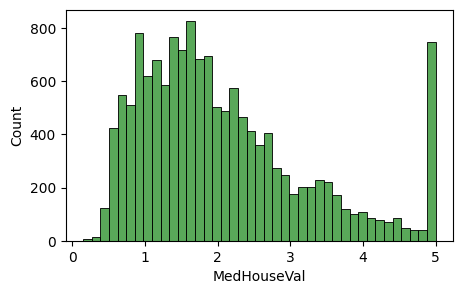

In [21]:
# 중위 주택 가격에 대한 분포
plt.figure(figsize=(5, 3))
sns.histplot(df_train['MedHouseVal'], color='forestgreen')
plt.show()

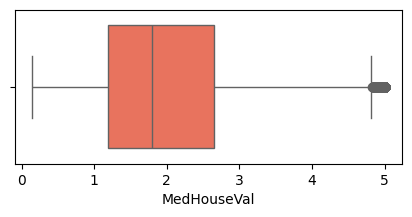

In [22]:
# 중위 주택 가격에 대한 분포
plt.figure(figsize=(5, 2))
sns.boxplot(x='MedHouseVal', color='tomato', data=df_train)
plt.show()

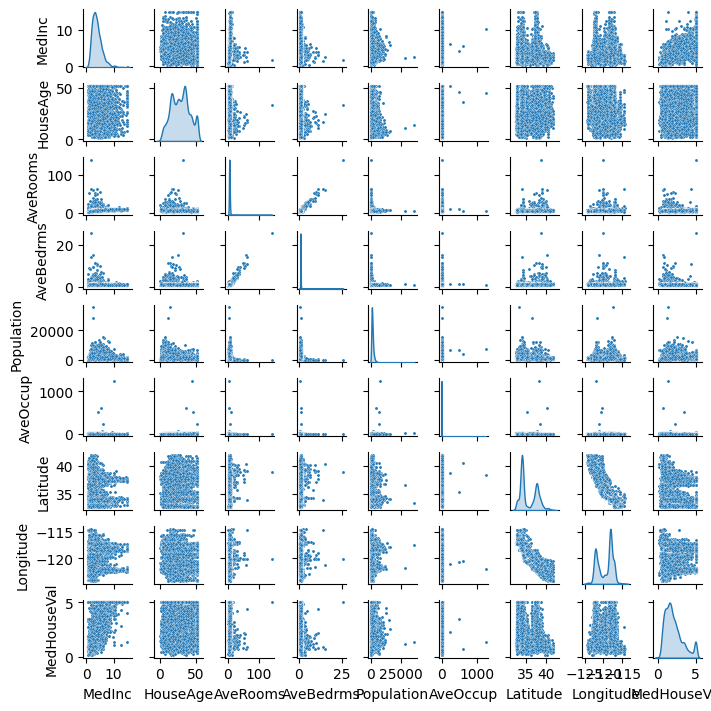

In [23]:
# 산점도
sns.pairplot(df_train, height=0.8, plot_kws={'s': 5}, diag_kind='kde')
plt.show()

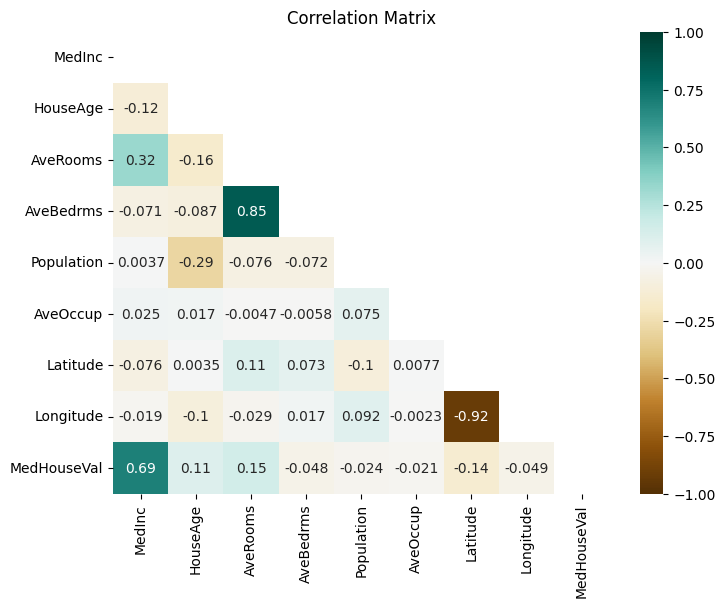

In [24]:
# 상관분석
corr_train = df_train.corr()
upp_mat = np.triu(corr_train)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_train, annot=True, mask=upp_mat, cmap='BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 5. 회귀모델 학습

In [26]:
# 상관관계가 강한 독립변수 선택
# scikit-learn에서 입력 데이터(feature)를 2차원 배열로 요구함
features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
X_train = df_train[features]

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# 선형 회귀모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀계수(regression coefficient)
pd.DataFrame({'Featurs': features, 'Coefficient': model.coef_})

,Featurs,Coefficient
0,MedInc,0.435658
1,HouseAge,0.016937
2,AveRooms,-0.019505
3,Latitude,-0.045071


In [31]:
# [참고] 회귀계수의 유의성
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3890.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:35:54   Log-Likelihood:                -17332.
No. Observations:               14448   AIC:                         3.467e+04
Df Residuals:                   14443   BIC:                         3.471e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6091      0.115     13.957      0.0

+ 독립변수가 중위 주택 가격에 미치는 영향은 다음과 같음
  + 지역 중위 소득이 1만 달러 증가할 때, 중위 주택 가격은 약 4만 3천 달러 증가하는 것으로 나타남. 이는 경제적으로 여유로운 가구일수록 더 비싼 주택에 거주하는 경향이 있음
  + 주택 연식이 1년 증가하면, 중위 주택 가격은 약 1,693달러 상승하는 것으로 나타남
  + 가구당 평균 방 개수가 1개 늘어날수록, 중위 주택 가격은 약 1,950달러 감소하는 경향이 있음
  + 위도가 1도 증가하면, 중위 주택 가격은 약 4,507달러 하락함. 이는 일반적으로 갤리포니아주 남부 지역에 대도시가 집중되어 있어, 해당 지역의 주택 가격이 반영된 것으로 해석됨

## 6. 회귀모델 평가

In [37]:
# 평가 데이터에서도 학습 데이터에서 사용한 독립변수만 선택
X_test = X_test[features]

# 평가 데이터의 예측값
y_pred = model.predict(X_test)

In [38]:
# 회귀모델 평가 : RMSE, 결정계수
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'RMSE : {RMSE:.3f}')
print(f'결정계수 : {R2:.3f}')

RMSE : 0.794
결정계수 : 0.520


+ 결과 및 시사점
  + 결정계수는 52.0%로 나타남
  + RMSE는 0.794로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 8만 달러 차이가 있다는 것을 의미함
  +학습 데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 25% 수준임을 알 수 있음
  + 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨